In [1]:
# import necessary dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the data
data = pd.read_csv("Churn_Modelling.csv")

In [3]:
data.shape

(10000, 14)

In [4]:
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4613,4614,15792565,Duncan,745,France,Female,46,7,0.00,2,1,1,67769.94,0
7175,7176,15638983,Jara,684,France,Female,38,5,133189.40,1,0,0,127388.06,0
3104,3105,15654230,Miller,526,Germany,Male,31,5,145537.21,1,1,0,132404.64,0
1661,1662,15806447,Mazzanti,690,Germany,Male,32,0,106683.52,2,1,1,137916.49,0
2637,2638,15677435,Kazantseva,647,France,Female,29,0,98263.46,2,1,0,164717.95,0
4248,4249,15703292,Chimezie,573,France,Male,26,8,86270.93,2,1,1,90177.30,0
2978,2979,15595917,Mackay,580,France,Female,35,1,102097.33,1,0,1,168285.85,0
2556,2557,15567486,Li,634,Spain,Female,41,4,0.00,2,1,1,164549.74,0
507,508,15677307,Lo,684,Germany,Female,40,6,137326.65,1,1,0,186976.60,0
4677,4678,15791780,Ts'ao,706,Germany,Female,48,10,104478.12,3,0,1,158248.71,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# Dropping of columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

In [8]:
data.sample(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9485,850,Spain,Male,37,4,88141.10,1,1,0,109659.12,0
3557,675,France,Male,34,1,124619.33,2,0,1,163667.56,0
7174,640,France,Female,50,9,117565.03,2,0,0,82559.77,0
3867,530,France,Male,39,2,0.00,2,1,0,197923.05,0
2334,803,Spain,Female,37,1,0.00,2,0,0,7455.20,0
1707,707,France,Female,40,5,0.00,2,1,0,41052.82,0
287,475,France,Female,32,8,119023.28,1,1,0,100816.29,0
7201,689,Germany,Female,30,5,136650.89,1,1,1,41865.72,1
4115,580,France,Female,23,5,113923.81,2,0,0,196241.43,0
7576,676,Spain,Male,27,4,0.00,1,0,1,107955.67,0


In [9]:
# changing categorical values to numerical values
data = pd.get_dummies(data,drop_first = True)
data = data.astype(int)

In [10]:
data.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
4079,583,31,4,158978,1,1,0,12538,0,0,0,0
8637,520,34,3,0,2,1,1,104703,0,0,0,1
2361,686,43,5,154846,2,1,1,151903,0,1,0,0
5957,612,76,6,96166,1,1,1,191393,0,1,0,1
2777,758,61,8,125397,1,1,0,182184,1,1,0,0
1499,461,28,8,0,1,1,1,103349,0,0,0,0
1150,700,27,6,137963,1,0,0,8996,0,0,0,0
3881,588,64,3,0,1,1,1,189703,0,0,0,0
4778,737,45,2,0,2,0,1,177695,0,0,1,0
3618,489,46,8,92060,1,1,0,147222,1,1,0,0


In [11]:
# Data visualization

In [12]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

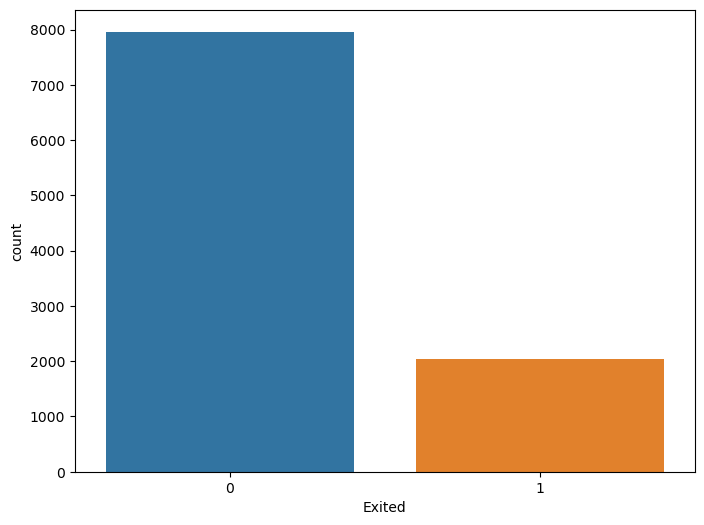

In [13]:
plt.figure(figsize =(8,6))
sns.countplot(x='Exited',data = data)

In [14]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [15]:
!pip install imblearn

In [16]:
# import necessary dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

In [17]:
# Training and testing of data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print('Training Shape: ', X_train.shape)
print('Testing Shape: ', X_test.shape)

Training Shape:  (9000, 11)
Testing Shape:  (1000, 11)


In [18]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
X_train_scaled

array([[-0.47944328,  0.19687202, -0.00234647, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 1.04580863,  1.33803657,  1.03625698, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [-0.85297437, -0.08841912,  1.03625698, ..., -0.5761528 ,
         1.73307782,  0.91105005],
       ...,
       [ 0.86941896, -0.08841912, -1.38715108, ..., -0.5761528 ,
        -0.57700814, -1.09763453],
       [ 0.16386025,  0.38706611,  1.03625698, ..., -0.5761528 ,
        -0.57700814,  0.91105005],
       [ 0.47513615,  1.14784248, -1.38715108, ...,  1.73565068,
        -0.57700814,  0.91105005]])

In [20]:
# Logistic Regression
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
LR = LogisticRegression()
LR.fit(X_train_scaled, y_train_classified)

LogisticRegression()

In [21]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy1 = LR.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy1)

Model Accuracy: 0.809


In [22]:
# SVM
from sklearn import svm
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
svm = svm.SVC()
svm.fit(X_train_scaled, y_train_classified)

SVC()

In [23]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy2 = svm.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy2)

Model Accuracy: 0.865


In [25]:
# Random Forest
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
rf = RandomForestClassifier()
rf.fit(X_train_scaled, y_train_classified)

RandomForestClassifier()

In [26]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy3 = rf.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy3)

Model Accuracy: 0.867


In [27]:
# Decision Tree Classifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
dt = DecisionTreeClassifier()
dt.fit(X_train_scaled, y_train_classified)

DecisionTreeClassifier()

In [28]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy4 = dt.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy4)

Model Accuracy: 0.796


In [29]:
# KNeighbors Classifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
KNN = KNeighborsClassifier()
KNN.fit(X_train_scaled, y_train_classified)

KNeighborsClassifier()

In [30]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy5 = KNN.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy5)

Model Accuracy: 0.84


In [31]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]
GBC = GradientBoostingClassifier()
GBC.fit(X_train_scaled, y_train_classified)

GradientBoostingClassifier()

In [32]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]
accuracy6 = GBC.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy6)

Model Accuracy: 0.867


In [33]:
performance_summary = pd.DataFrame({
    'Model':['LR','svm','KNN','dt','rf','GBC'],
    'ACC':[accuracy1,
           accuracy2,
           accuracy3,
           accuracy4,
           accuracy5,
           accuracy6
          ]
})
performance_summary

,Model,ACC
0,LR,0.809
1,svm,0.865
2,KNN,0.867
3,dt,0.796
4,rf,0.840
5,GBC,0.867
